In this project, we aim to explore the influence of various factors on student performance in math, reading, and writing tests. Specifically, we'll examine the impact of gender, ethnicity, parental education level, type of lunch, and participation in a test preparation course.

[Dataset Source](roycekimmons.com/tools/generated_data/exams)

Import required libraries/packages.

In [119]:
import pandas as pd
import plotly_express as px
import matplotlib.pyplot as plt


Load the dataset into a dataframe and print a sample of the data.

In [120]:
#
exam_performance_df = pd.read_csv('../student_exams.csv')
display(exam_performance_df.sample(10))

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
921,female,group C,high school,free/reduced,none,35,53,46
0,female,group B,bachelor's degree,standard,none,72,72,74
685,female,group E,master's degree,standard,completed,94,99,100
488,male,group B,some high school,standard,completed,64,53,57
714,female,group B,some high school,standard,completed,60,70,74
277,female,group E,high school,standard,completed,59,63,75
103,male,group B,high school,standard,completed,60,44,47
876,male,group D,some college,standard,none,81,82,84
13,male,group A,some college,standard,completed,78,72,70
413,male,group B,some high school,standard,completed,63,67,67


In this dataset there are 1000 rows and 8 columns. There are 5 categorical 3 numeric columns.

In [121]:
display(exam_performance_df.shape)
display(exam_performance_df.info())

(1000, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


None

Rename columns by removing replacing white space with underscore.

In [122]:
display(exam_performance_df.columns)
# rename columns in dataframe
exam_performance_df.rename(columns={
                            'race/ethnicity': 'ethnicity', 
                            'parental level of education': 'parent_education', 
                            'test preparation course': 'test_preparation_course',
                            'math score': 'math_score',
                            'reading score':'reading_score',
                            'writing score':'writing_score'}, inplace=True)
display(exam_performance_df.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Index(['gender', 'ethnicity', 'parent_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

Check for missing values and duplicates: There are no duplicate rows in the dataframe and there are no missing values in any of the columns.

In [123]:
# check for duplicate rows.
display(f'There are {exam_performance_df.duplicated().sum()} duplicate entries')
# check for missing values.
display('Missing values in each column:')
display(exam_performance_df.isnull().sum())

'There are 0 duplicate entries'

'Missing values in each column:'

gender                     0
ethnicity                  0
parent_education           0
lunch                      0
test_preparation_course    0
math_score                 0
reading_score              0
writing_score              0
dtype: int64

Print a summary of the numerical columns. In the context of the data, print summary of the math, reading, and writing test scores.

In [124]:
# summary of numerical columns
display(exam_performance_df.describe())

,math_score,reading_score,writing_score
count,1000.00,1000.00,1000.00
mean,66.09,69.17,68.05
std,15.16,14.60,15.20
min,0.00,17.00,10.00
25%,57.00,59.00,57.75
50%,66.00,70.00,69.00
75%,77.00,79.00,79.00
max,100.00,100.00,100.00


Create a new column containing the average of the three scores per student.

In [142]:
# create a new column for average test scores
# calculate sum of all test scores.
exam_totals = exam_performance_df['math_score'] + exam_performance_df['reading_score'] + exam_performance_df['writing_score']
# calcualte average test score. 
exam_performance_df['average_score'] = exam_totals / 3
display(exam_performance_df.sample(5))

,gender,ethnicity,parent_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score
765,female,group B,high school,standard,none,74,72,72,72.67
315,male,group C,high school,standard,none,71,66,65,67.33
36,female,group D,associate's degree,standard,none,74,81,83,79.33
414,female,group C,bachelor's degree,free/reduced,completed,51,72,79,67.33
272,female,group D,associate's degree,free/reduced,none,47,53,58,52.67


Create a histogram to see the distribution of of all math, reading and writing scores. 

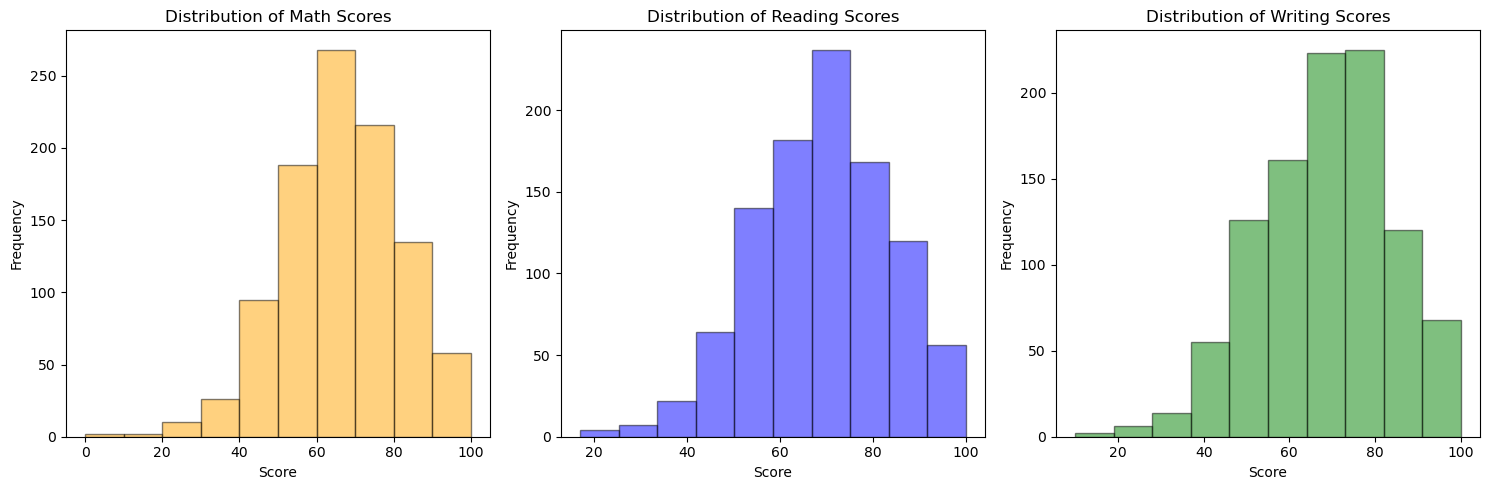

In [143]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# create a histogram to show the distribution of math scores
axes[0].hist(exam_performance_df['math_score'], bins=10, alpha=0.5, label='math scores', edgecolor='black', color='orange')
axes[0].set_title('Distribution of Math Scores')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Frequency')

# create a histogram to show the distribution of reading scores
axes[1].hist(exam_performance_df['reading_score'], bins=10, alpha=0.5, label='reading scores', edgecolor='black', color='blue')
axes[1].set_title('Distribution of Reading Scores')
axes[1].set_xlabel('Score')
axes[1].set_ylabel('Frequency')

# create a histrogram to show the distribution of writing scores
axes[2].hist(exam_performance_df['writing_score'], bins=10, alpha=0.5, label='writing scores', edgecolor='black', color='green')
axes[2].set_title('Distribution of Writing Scores')
axes[2].set_xlabel('Score')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Create a histrogram to show the distrubtion of average scores by gender. 

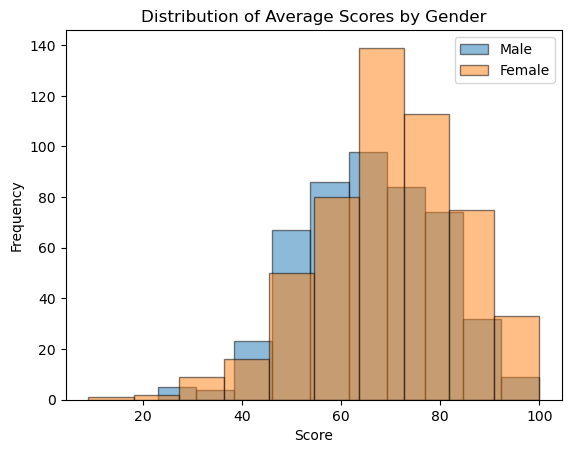

In [144]:
# Extract scores by gender
male_scores = exam_performance_df[exam_performance_df['gender'] == 'male']['average_score']
female_scores = exam_performance_df[exam_performance_df['gender'] == 'female']['average_score']

# Plot histograms side by side
plt.hist(male_scores, bins=10, alpha=0.5, label='Male', edgecolor='black')
plt.hist(female_scores, bins=10, alpha=0.5, label='Female', edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Average Scores by Gender')
plt.legend(loc='upper right')
plt.show()

Create Box plots to visualizes the distribution of students' average scores based on their parents' education levels. 

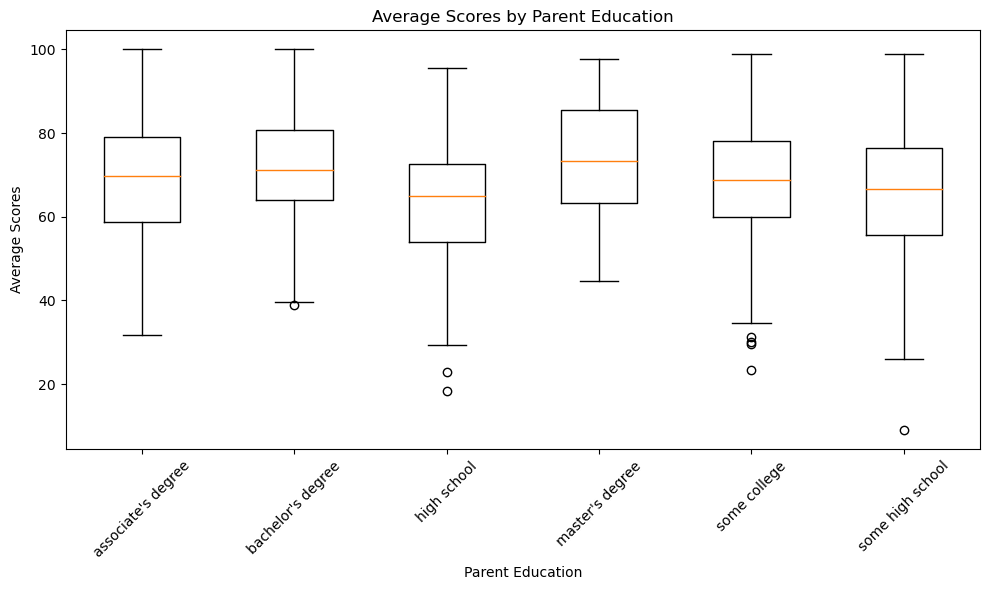

In [128]:
# Prepare data for boxplot
categories = sorted(exam_performance_df['parent_education'].unique())
math_scores_by_parent_education = [exam_performance_df['average_score'][exam_performance_df['parent_education'] == category].values for category in categories]

# Create the box plot
plt.figure(figsize=(10,6))
plt.boxplot(math_scores_by_parent_education)
plt.title('Average Scores by Parent Education')
plt.xlabel('Parent Education')
plt.ylabel('Average Scores')
# Set the x-ticks to be the parent education categories
plt.xticks(range(1, len(categories)+1), categories, rotation=45)  
plt.tight_layout()
plt.show()

Create Box plots to visualizes the distribution of students' average scores based on the type of lunch they received.

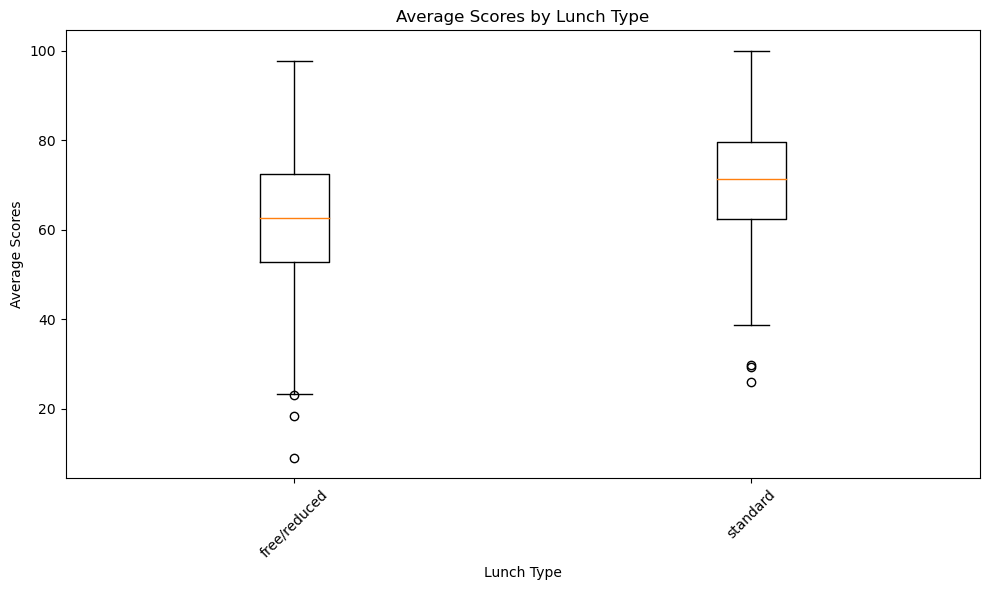

In [129]:
# Prepare data for boxplot
categories = sorted(exam_performance_df['lunch'].unique())
math_scores_by_parent_education = [exam_performance_df['average_score'][exam_performance_df['lunch'] == category].values for category in categories]

# Create the box plot
plt.figure(figsize=(10,6))
plt.boxplot(math_scores_by_parent_education)
plt.title('Average Scores by Lunch Type')
plt.xlabel('Lunch Type')
plt.ylabel('Average Scores')
# Set the x-ticks to be the parent education categories
plt.xticks(range(1, len(categories)+1), categories, rotation=45)  
plt.tight_layout()
plt.show()

Create Box plots to visualizes the distribution of students' average scores based on their completion of a test preparation score.

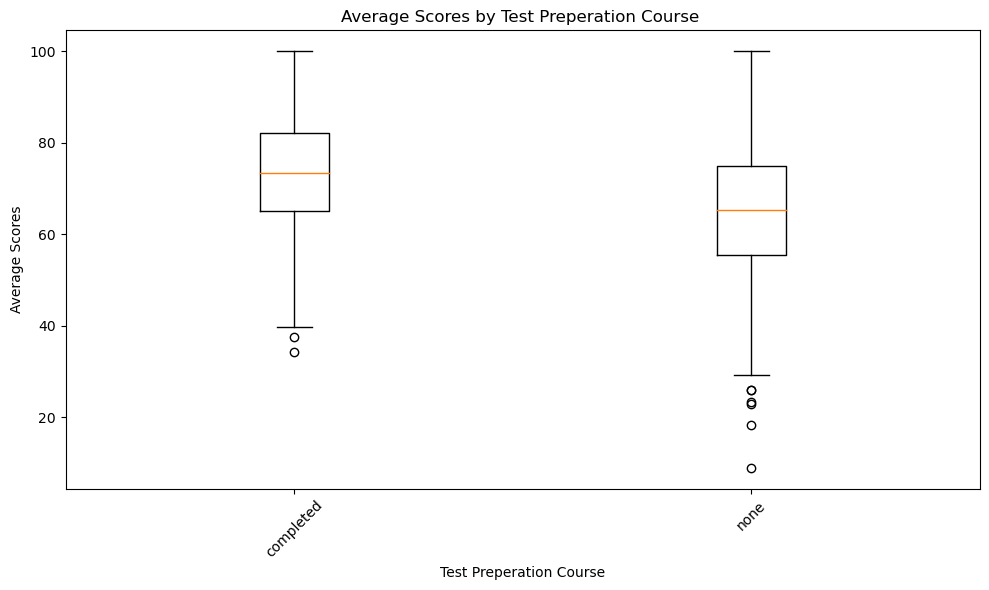

In [130]:
# Prepare data for boxplot
categories = sorted(exam_performance_df['test_preparation_course'].unique())
math_scores_by_parent_education = [exam_performance_df['average_score'][exam_performance_df['test_preparation_course'] == category].values for category in categories]

# Create the box plot
plt.figure(figsize=(10,6))
plt.boxplot(math_scores_by_parent_education)
plt.title('Average Scores by Test Preperation Course ')
plt.xlabel('Test Preperation Course')
plt.ylabel('Average Scores')
# Set the x-ticks to be the parent education categories
plt.xticks(range(1, len(categories)+1), categories, rotation=45)  
plt.tight_layout()
plt.show()

Create a scatter matrix (pair plot) to see the correlation between the results of each test. 

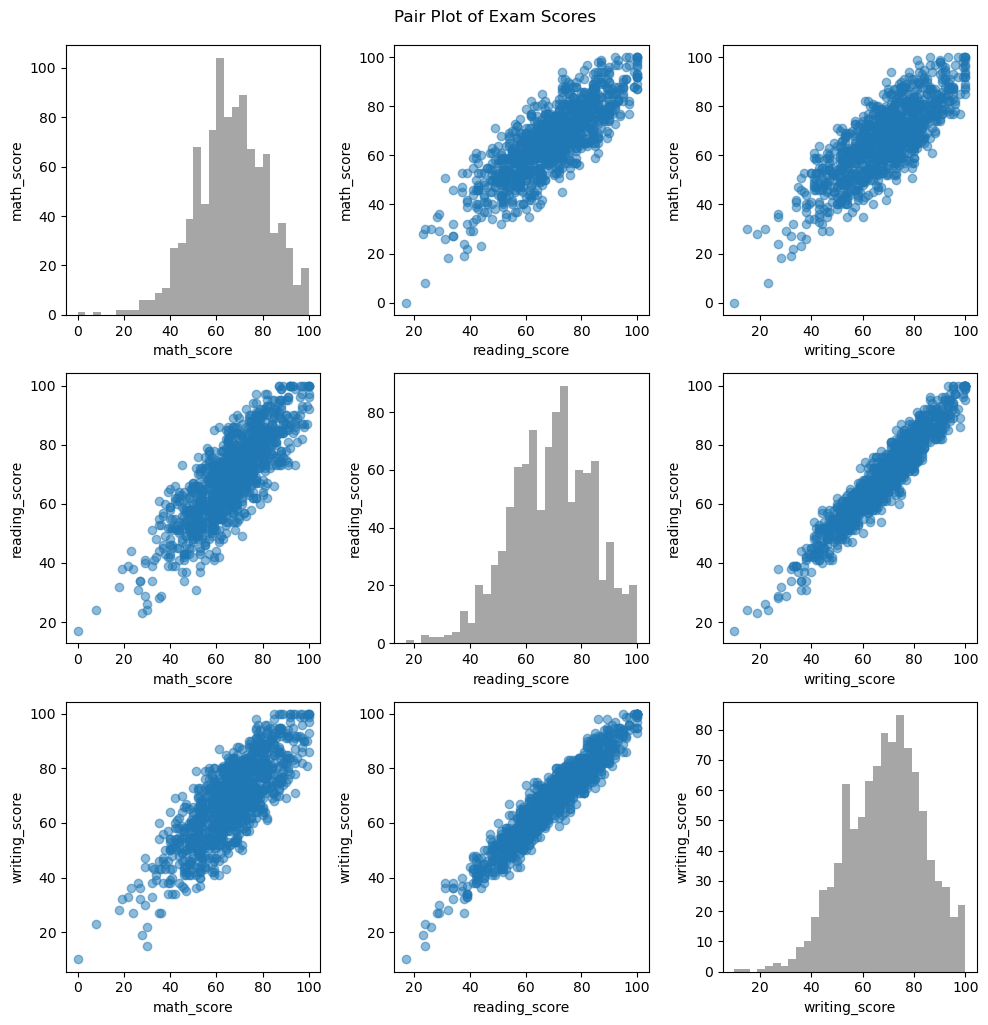

In [131]:
scores = ['math_score', 'reading_score', 'writing_score']

def plot_scatter(x, y, ax):
    ax.scatter(exam_performance_df[x], exam_performance_df[y], alpha=0.5)
    ax.set_xlabel(x)
    ax.set_ylabel(y)

def plot_histogram(x, ax):
    ax.hist(exam_performance_df[x], bins=30, color='gray', alpha=0.7)
    ax.set_xlabel(x)
    ax.set_ylabel(x)

fig, axes = plt.subplots(len(scores), len(scores), figsize=(10, 10))

for i, row_score in enumerate(scores):
    for j, col_score in enumerate(scores):
        ax = axes[i, j]
        if i == j:
            plot_histogram(col_score, ax)
        else:
            plot_scatter(col_score, row_score, ax)

plt.tight_layout()
plt.suptitle('Pair Plot of Exam Scores', y=1.02)
plt.show()







In [132]:
# Box plot for average exam scores vs. parent education
fig = px.box(exam_performance_df, x='parent_education', y='average_score', title='Average Score by Parent Education', 
             category_orders={"parent_education": sorted(exam_performance_df['parent_education'].unique())})
fig.show()